# Importing Required Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Loading the Dataframe

In [60]:
### Loading the DataFrame using Pandas 

df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

# Performing Data Cleaning

In [61]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [62]:

df[' education']=df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df[' self_employed']=df[' self_employed'].replace({' Yes': 1, ' No': 0})
df[' loan_status']=df[' loan_status'].map({' Approved': 1, ' Rejected': 0})

/tmp/ipykernel_92/1316771210.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[' self_employed']=df[' self_employed'].replace({' Yes': 1, ' No': 0})


In [64]:
df[' education'].value_counts()

 education
1    2144
0    2125
Name: count, dtype: int64

In [65]:
### Making sure our Data is Clean

df.isna().sum()
    

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [66]:
df.rename(columns={' loan_status':'loan_status'},inplace=True)
df=df.drop(columns='loan_id',axis=1)


In [67]:
### Asssigning our Features and Labels

Y=labels=df['loan_status']
X=feature=df.copy().drop(columns=['loan_status'],axis=1)

In [68]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', 'loan_status'],
      dtype='object')

In [70]:
standard_cols=[col for col in df.columns if (max(df[col].values.tolist())!=1 or min(df[col].values.tolist()))]
standard_cols

[' no_of_dependents',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled=feature.copy()
feature_scaled[standard_cols]=scaler.fit_transform(feature[standard_cols])


In [74]:
feature_scaled.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,4.826830e-17,0.502225,0.503631,1.656102e-16,7.989237e-17,-9.320776e-17,2.596502e-16,4.161061e-17,4.993273e-18,-5.700653e-17,4.826830e-17
std,1.000117e+00,0.500054,0.500045,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00
min,-1.473548e+00,0.000000,0.000000,-1.731375e+00,-1.640450e+00,-1.559151e+00,-1.739665e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00
25%,-8.838247e-01,0.000000,0.000000,-8.405896e-01,-8.220748e-01,-8.584443e-01,-8.522468e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01
50%,2.956212e-01,1.000000,1.000000,1.456473e-02,-7.005410e-02,-1.577371e-01,3.709143e-04,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01
75%,8.853442e-01,1.000000,1.000000,8.697190e-01,7.040849e-01,8.933237e-01,8.587888e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01
max,1.475067e+00,1.000000,1.000000,1.724873e+00,2.694728e+00,1.594031e+00,1.740407e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00


In [75]:
X=feature_scaled

In [76]:
### Splitting the Data into Training and Testing sets

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state= 42, stratify= labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3201, 11), (1068, 11), (3201,), (1068,))

In [77]:
### Building our Logistic Regression model and Fitting it to our Data

model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Accuracy of Logistic Regression: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       404
           1       0.93      0.94      0.93       664

    accuracy                           0.92      1068
   macro avg       0.91      0.91      0.91      1068
weighted avg       0.92      0.92      0.92      1068



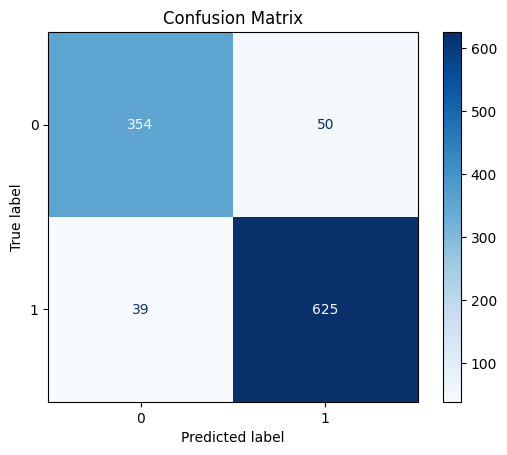

In [78]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.title("Confusion Matrix")
plt.show()

The number of Approved Loans = 1613
The number of Rejected Loans = 2656


<Axes: ylabel='count'>

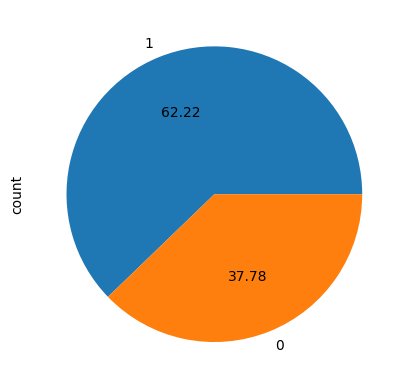

In [79]:
### Now we will deal with the data imbalance 

print("The number of Approved Loans =", Y.value_counts()[0])
print("The number of Rejected Loans =", Y.value_counts()[1])
Y.value_counts().plot.pie(autopct='%.2f')

# Analytics


> Note: By using the standard scaler preprocessing with Logistic regression, I was able to achieve an accuracy of approximately 92% which is quite remarkable ❗❗


# Addressing Class Imbalance with SMOTE 

In [80]:
!pip install -q imbalanced-learn

# Applying Over sampling to the dataset

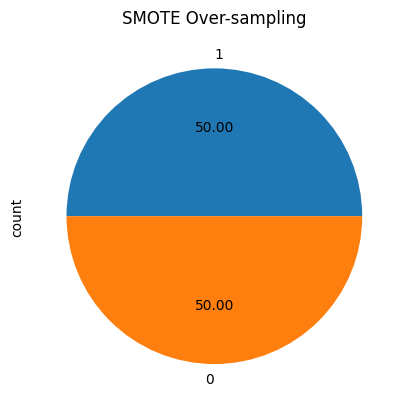

In [81]:
### Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE Over-sampling")

# Applying Under Sampling 

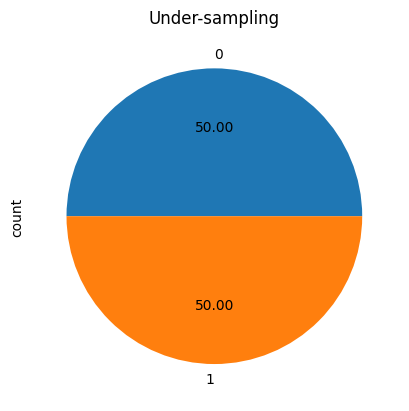

In [82]:
### Applying Random Undersampling to our Data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [84]:
### Splitting the Data into Training and Testing sets
Y_res= np.array(y_res).reshape(-1,1)
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(X_res,Y_res, random_state= 42, stratify= Y_res)
x_train_res.shape, x_test_res.shape, y_train_res.shape, y_test_res.shape

((2419, 11), (807, 11), (2419, 1), (807, 1))

In [85]:
### Building our Logistic Regression model and Fitting it to our Data

model= LogisticRegression()
model.fit(x_train_res, y_train_res)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy of Logistic Regression after Data Sampling: 0.9491945477075588
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       404
           1       0.96      0.94      0.95       403

    accuracy                           0.95       807
   macro avg       0.95      0.95      0.95       807
weighted avg       0.95      0.95      0.95       807



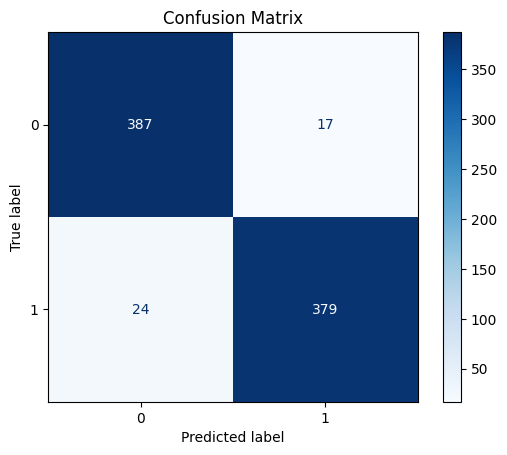

In [86]:
y_pred_res = model.predict(x_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

print("Accuracy of Logistic Regression after Data Sampling:", accuracy_score(y_test_res, y_pred_res))
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))
plt.title("Confusion Matrix")
plt.show()

# Analytics


> Note: By using the standard scaler preprocessing with SMOTE preprocessing to handle class imbalance and then train on  Logistic regression model, I was able to achieve an accuracy of approximately 95% which is quite remarkable ❗❗
